In [113]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading dataset from Kaggle house price prediction competition

In [114]:
df = pd.read_csv('E:\\Media, Docs & Programs\\Practice\\DataScience\\House Price Kaggle\\train.csv')

In [115]:
df.head(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000


In [116]:
df['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

## At a glance, we see that the houses in this database are located in different states, which were built between 1872 and 2010. It is also noteworthy that the land area of these houses is very scattered. These values are from 1300 feet to 215,000 feet. Naturally, this big lands in the dataset cannot be expected to be seen repeatedly.

In [117]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## This can also be seen in the LotArea column distribution, which is highly skewed (right skew). Given the 99% quantile value and the graph showing the relationship between Lot area and sale price, we deleted data larger than 99% quantile.

37567.64000000021


C:\Users\Soroush\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


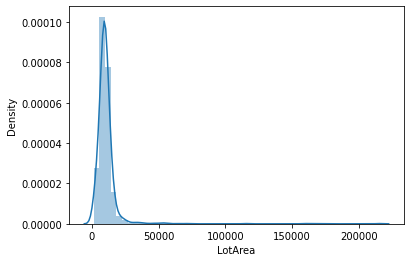

In [118]:
sns.distplot(df['LotArea'])
print(df['LotArea'].quantile(0.99))

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

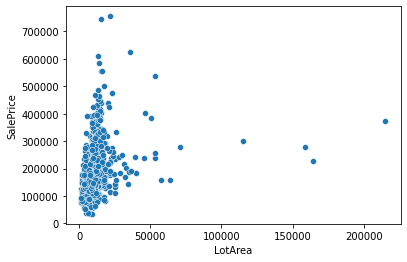

In [119]:
sns.scatterplot(data=df, x='LotArea', y='SalePrice')

<AxesSubplot:ylabel='LotArea'>

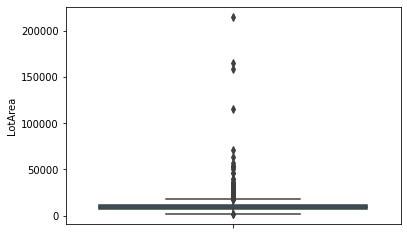

In [120]:
sns.boxplot(y=df['LotArea'])

## You can see that almost all the houses with land larger than 37,000 feet are extremely old.

In [121]:
df[df['LotArea']>df['LotArea'].quantile(0.99)]['YearBuilt']

53      1981
249     1958
271     1954
313     1965
335     1965
384     1992
451     1975
457     1954
523     2007
661     1994
706     1971
769     2003
848     1908
1298    2008
1396    1948
Name: YearBuilt, dtype: int64

In [122]:
df = df[df['LotArea']<=df['LotArea'].quantile(0.99)].reset_index().drop('index', axis=1)

## The amount of empty data must also be considered, some columns have a large number of empty values that must be handled correctly. But first let's look at which of these features have the most impact on the selling price and are correlated.

<AxesSubplot:>

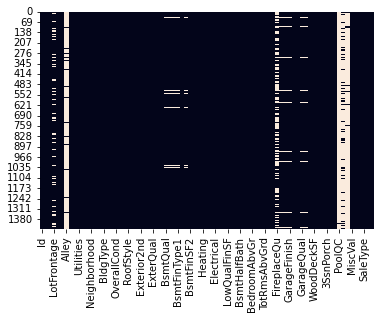

In [123]:
sns.heatmap(df.isnull(), cbar=False)

<AxesSubplot:>

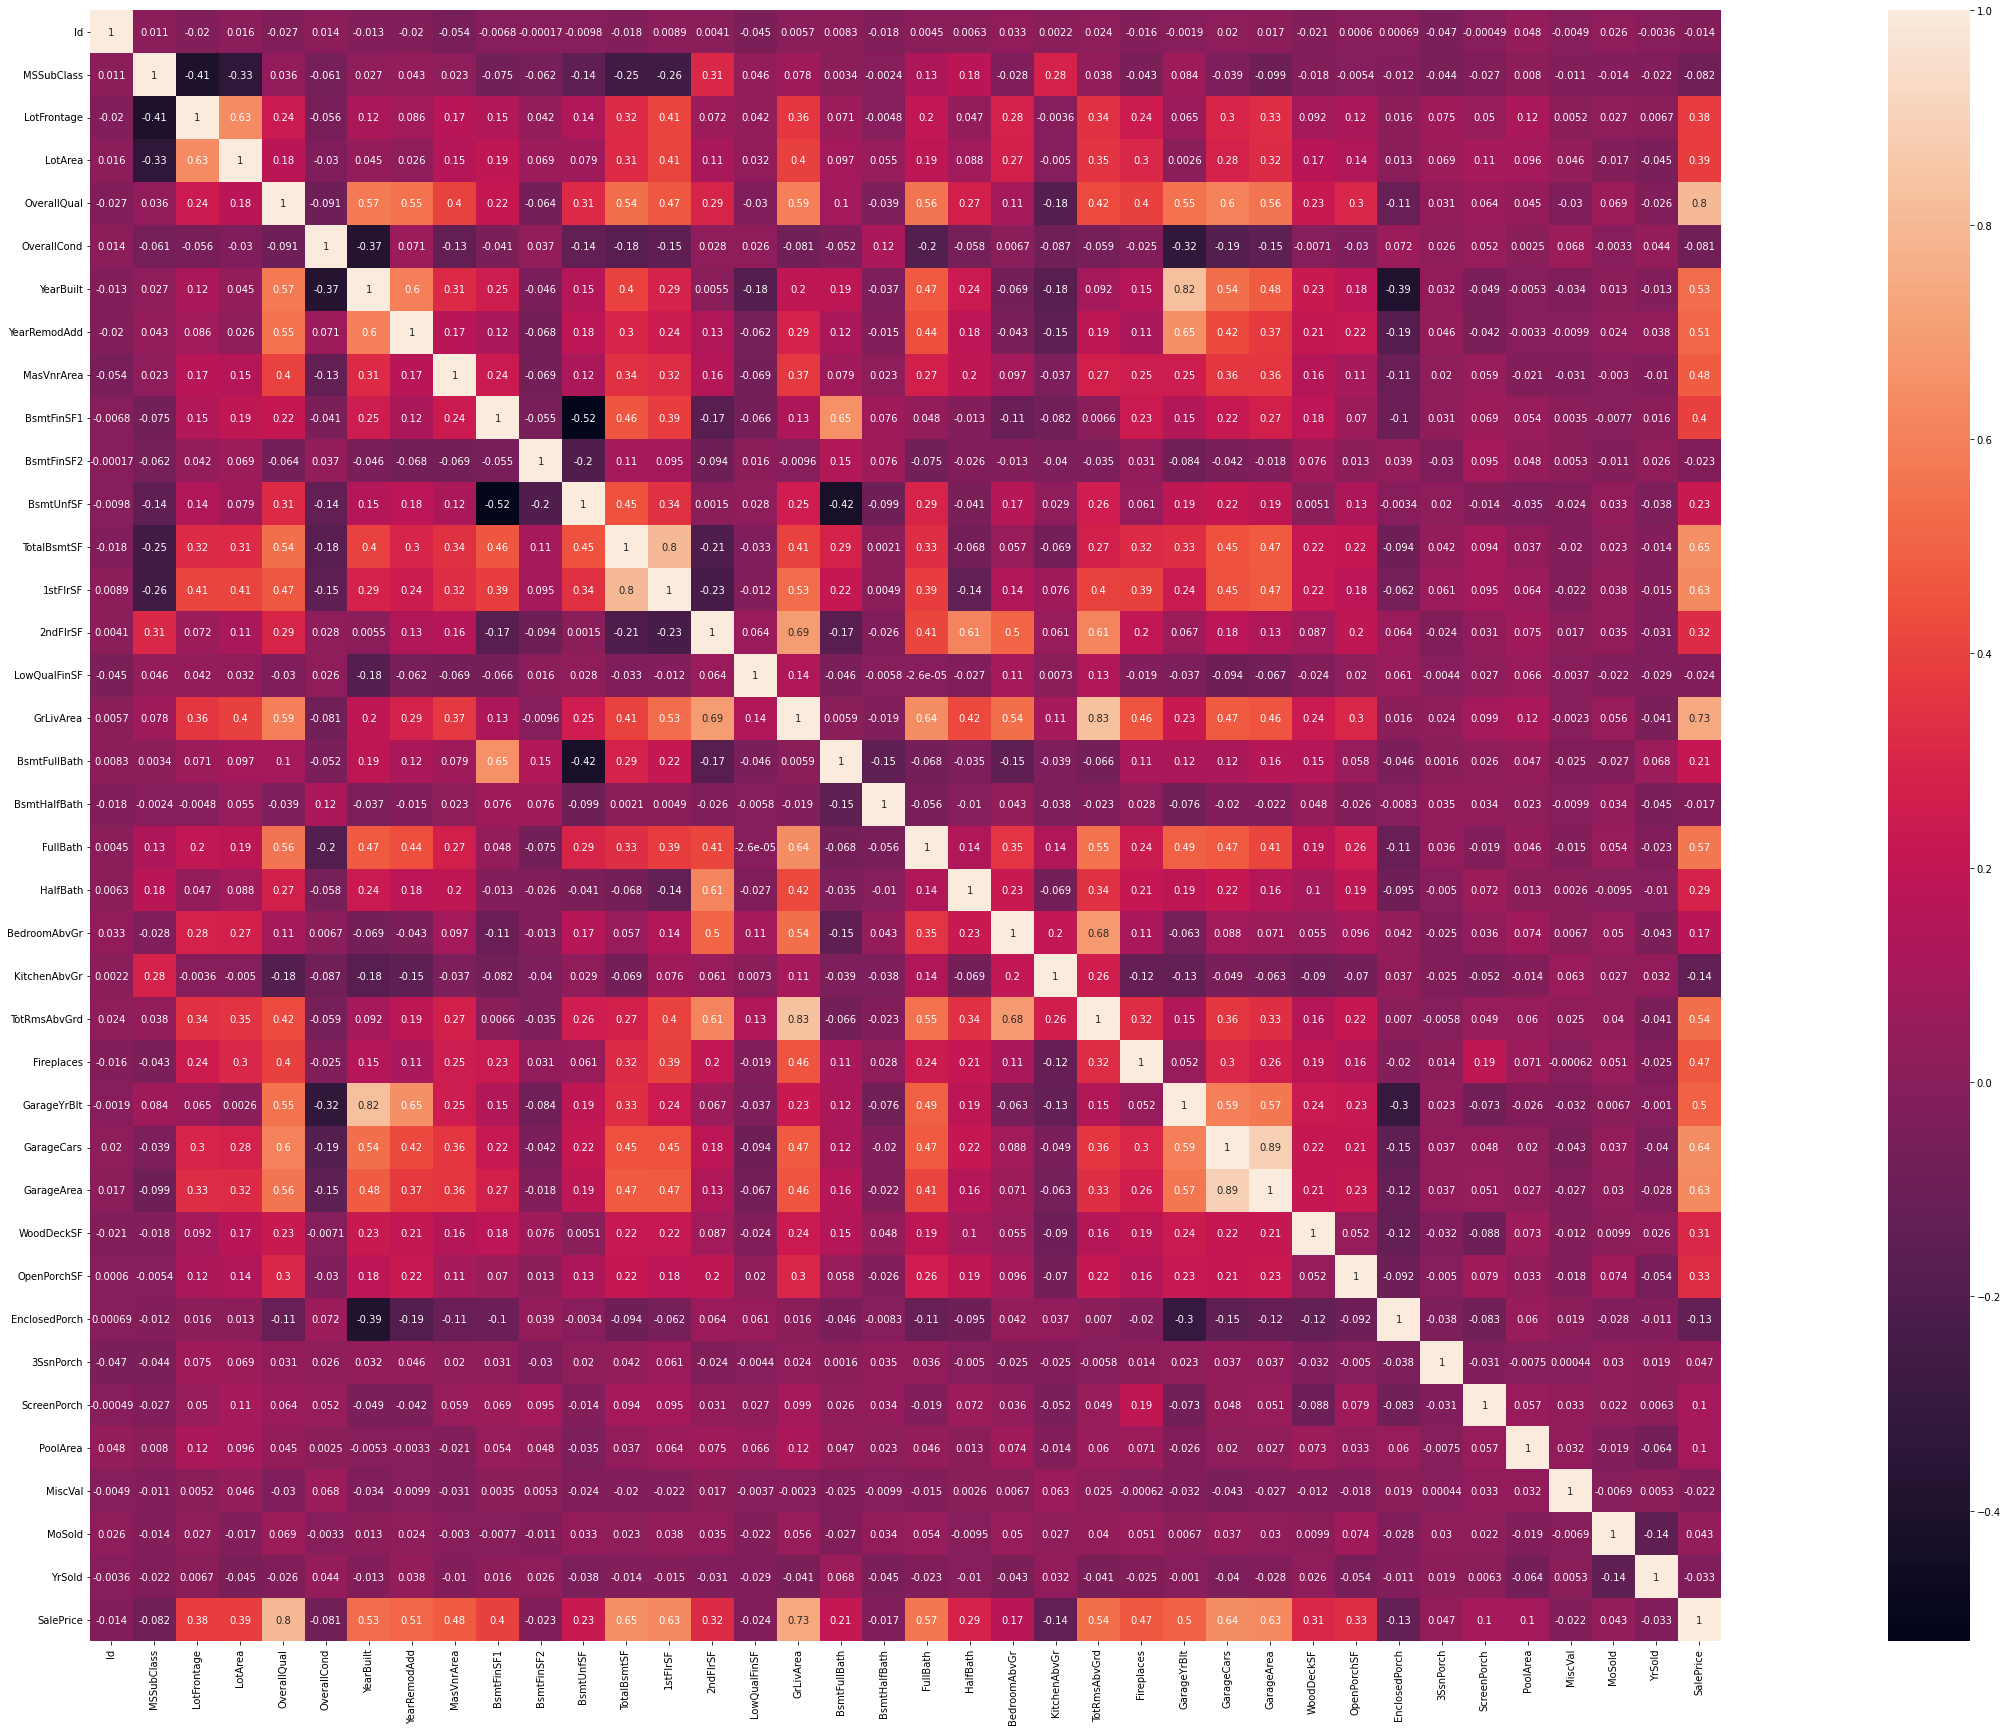

In [124]:
#Numeric Features
numeric_features = df.select_dtypes(include=[np.number])
corr = numeric_features.corr()
plt.subplots(figsize=(60, 30))
sns.heatmap(corr, square=True, annot=True)

In [125]:
['GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'GarageArea', 'OverallQual', 'GarageCars', 'YearRemodAdd', 'SaleCondition', 'Neighborhood', '1stFloor', 'FullBath', 'roomabvgrnd']

['GrLivArea',
 'TotalBsmtSF',
 'YearBuilt',
 'GarageArea',
 'OverallQual',
 'GarageCars',
 'YearRemodAdd',
 'SaleCondition',
 'Neighborhood',
 '1stFloor',
 'FullBath',
 'roomabvgrnd']

## Now we will examine the features that their correlation with sale price are more than 0.5, but before that, let's look at the correlation between land area and sale price. The correlation between land area and price is not realy sensible, and it can be assumed that the impact of property within the land has a major impact on the price.

<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

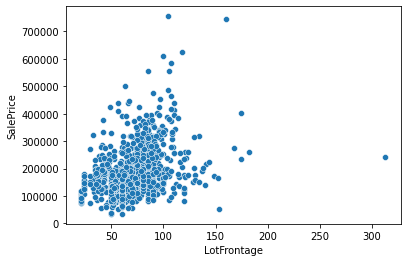

In [126]:
sns.scatterplot(data=df, x='LotFrontage', y='SalePrice')

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

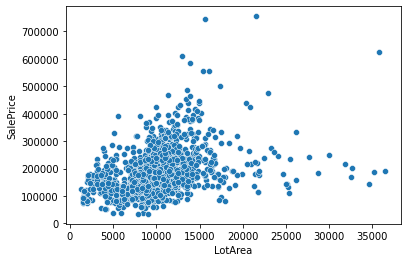

In [127]:
sns.scatterplot(data=df, x='LotArea', y='SalePrice')

## To better understand the relationship between features and house prices, we show those with higher correlations next to the price in scatterplot.

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

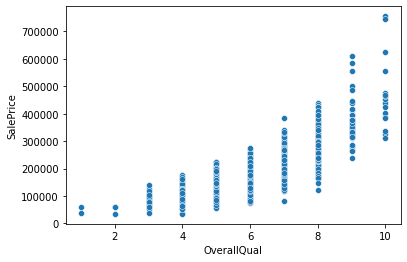

In [128]:
sns.scatterplot(data=df, x='OverallQual', y='SalePrice')

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

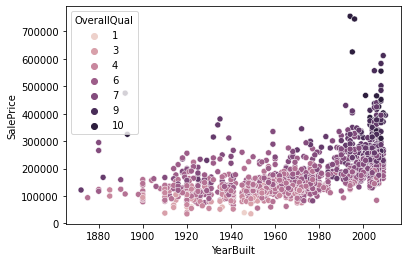

In [129]:
sns.scatterplot(data=df, x='YearBuilt', y='SalePrice', hue='OverallQual')

<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

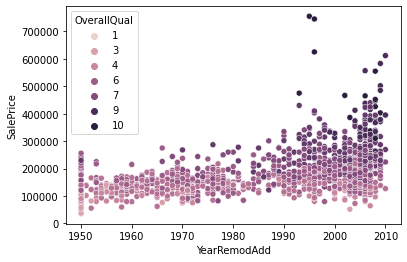

In [130]:
sns.scatterplot(data=df, x='YearRemodAdd', y='SalePrice', hue='OverallQual')

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

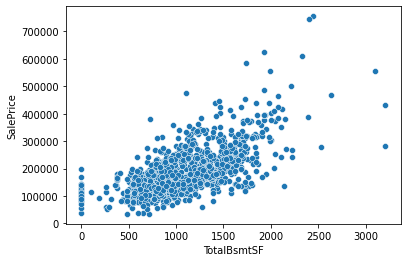

In [131]:
sns.scatterplot(data=df, x='TotalBsmtSF', y='SalePrice')

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

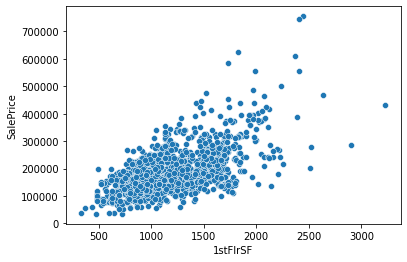

In [132]:
sns.scatterplot(data=df, x='1stFlrSF', y='SalePrice')

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

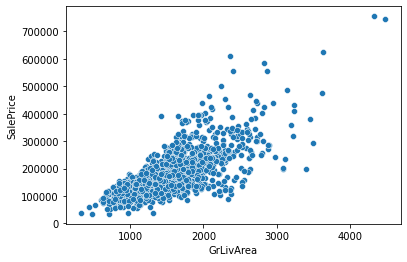

In [133]:
sns.scatterplot(data=df, x='GrLivArea', y='SalePrice')

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

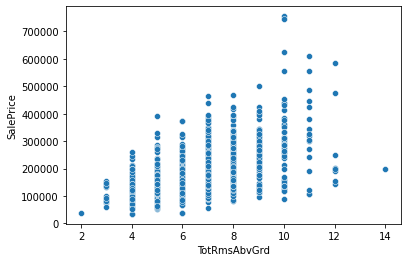

In [134]:
sns.scatterplot(data=df, x='TotRmsAbvGrd', y='SalePrice')

<AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>

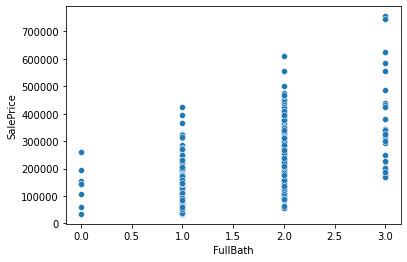

In [135]:
sns.scatterplot(data=df, x='FullBath', y='SalePrice')

<AxesSubplot:xlabel='Fireplaces', ylabel='SalePrice'>

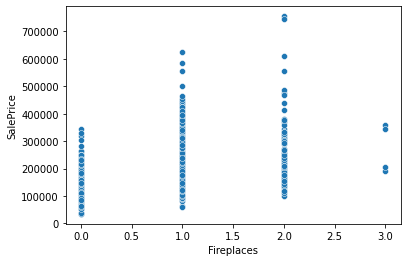

In [136]:
sns.scatterplot(data=df, x='Fireplaces', y='SalePrice')

## In this step we divide the dataset to dependent (y) and independent (X) variables

In [137]:
X = df[['GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'GarageArea', 'YearRemodAdd', 'OverallQual', 'SaleCondition', 'Neighborhood']]
y= df['SalePrice']

In [138]:
X

,GrLivArea,TotalBsmtSF,YearBuilt,GarageArea,YearRemodAdd,OverallQual,SaleCondition,Neighborhood
0,1710,856,2003,548,2003,7,Normal,CollgCr
1,1262,1262,1976,460,1976,6,Normal,Veenker
2,1786,920,2001,608,2002,7,Normal,CollgCr
3,1717,756,1915,642,1970,7,Abnorml,Crawfor
4,2198,1145,2000,836,2000,8,Normal,NoRidge
...,...,...,...,...,...,...,...,...
1440,1647,953,1999,460,2000,6,Normal,Gilbert
1441,2073,1542,1978,500,1988,6,Normal,NWAmes
1442,2340,1152,1941,252,2006,7,Normal,Crawfor
1443,1078,1078,1950,240,1996,5,Normal,NAmes


## Label and One Hot encoder for categorical features

In [139]:
dum = pd.get_dummies(X[['SaleCondition', 'Neighborhood']], drop_first=True)
X = pd.concat([X, dum], axis=1) 
X.head(4)

,GrLivArea,TotalBsmtSF,YearBuilt,GarageArea,YearRemodAdd,OverallQual,SaleCondition,Neighborhood,SaleCondition_AdjLand,SaleCondition_Alloca,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,1710,856,2003,548,2003,7,Normal,CollgCr,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1262,1262,1976,460,1976,6,Normal,Veenker,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1786,920,2001,608,2002,7,Normal,CollgCr,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1717,756,1915,642,1970,7,Abnorml,Crawfor,0,0,...,0,0,0,0,0,0,0,0,0,0


## It's time to split the data to train and test sets.

In [140]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [141]:
X_train

,GrLivArea,TotalBsmtSF,YearBuilt,GarageArea,YearRemodAdd,OverallQual,SaleCondition,Neighborhood,SaleCondition_AdjLand,SaleCondition_Alloca,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
1315,1632,935,1998,462,1998,7,Normal,Gilbert,0,0,...,0,0,0,0,0,0,0,0,0,0
753,1494,1494,1995,481,1996,8,Normal,Veenker,0,0,...,0,0,0,0,0,0,0,0,0,1
807,1358,1358,2009,484,2010,7,Partial,NridgHt,0,0,...,0,1,0,0,0,0,0,0,0,0
1173,1699,978,1900,420,1970,3,Abnorml,OldTown,0,0,...,0,0,1,0,0,0,0,0,0,0
1016,1218,672,1972,264,1972,6,Normal,BrDale,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,1812,360,1900,672,1996,5,Normal,OldTown,0,0,...,0,0,1,0,0,0,0,0,0,0
1133,1298,1298,1985,403,1985,6,Normal,SawyerW,0,0,...,0,0,0,0,0,1,0,0,0,0
355,912,888,1978,470,1978,6,Normal,Mitchel,0,0,...,0,0,0,0,0,0,0,0,0,0
582,2296,1722,2008,842,2008,10,Normal,NridgHt,0,0,...,0,1,0,0,0,0,0,0,0,0


## Scaling numeric columns

In [142]:
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transform data
X_train[['GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'GarageArea', 'YearRemodAdd', 'OverallQual']] = scaler.fit_transform(X_train[['GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'GarageArea', 'YearRemodAdd', 'OverallQual']])

C:\Users\Soroush\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3673: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [143]:
X_train

,GrLivArea,TotalBsmtSF,YearBuilt,GarageArea,YearRemodAdd,OverallQual,SaleCondition,Neighborhood,SaleCondition_AdjLand,SaleCondition_Alloca,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
1315,0.295691,0.291641,0.911111,0.340708,0.800000,0.666667,Normal,Gilbert,0,0,...,0,0,0,0,0,0,0,0,0,0
753,0.261516,0.466001,0.888889,0.354720,0.766667,0.777778,Normal,Veenker,0,0,...,0,0,0,0,0,0,0,0,0,1
807,0.227836,0.423581,0.992593,0.356932,1.000000,0.666667,Partial,NridgHt,0,0,...,0,1,0,0,0,0,0,0,0,0
1173,0.312283,0.305053,0.185185,0.309735,0.333333,0.222222,Abnorml,OldTown,0,0,...,0,0,1,0,0,0,0,0,0,0
1016,0.193165,0.209607,0.718519,0.194690,0.366667,0.555556,Normal,BrDale,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,0.340267,0.112289,0.185185,0.495575,0.766667,0.444444,Normal,OldTown,0,0,...,0,0,1,0,0,0,0,0,0,0
1133,0.212977,0.404866,0.814815,0.297198,0.583333,0.555556,Normal,SawyerW,0,0,...,0,0,0,0,0,1,0,0,0,0
355,0.117385,0.276981,0.762963,0.346608,0.466667,0.555556,Normal,Mitchel,0,0,...,0,0,0,0,0,0,0,0,0,0
582,0.460129,0.537118,0.985185,0.620944,0.966667,1.000000,Normal,NridgHt,0,0,...,0,1,0,0,0,0,0,0,0,0


array([[<AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>],
       [<AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'GarageArea'}>],
       [<AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'OverallQual'}>]], dtype=object)

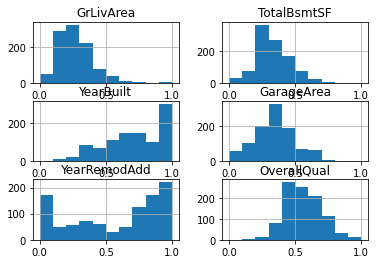

In [144]:
X_train.iloc[:, :8].hist()

In [145]:
X_train = X_train.drop(['SaleCondition', 'Neighborhood'], axis=1)

In [146]:
X_train

,GrLivArea,TotalBsmtSF,YearBuilt,GarageArea,YearRemodAdd,OverallQual,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
1315,0.295691,0.291641,0.911111,0.340708,0.800000,0.666667,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
753,0.261516,0.466001,0.888889,0.354720,0.766667,0.777778,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
807,0.227836,0.423581,0.992593,0.356932,1.000000,0.666667,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1173,0.312283,0.305053,0.185185,0.309735,0.333333,0.222222,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1016,0.193165,0.209607,0.718519,0.194690,0.366667,0.555556,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,0.340267,0.112289,0.185185,0.495575,0.766667,0.444444,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1133,0.212977,0.404866,0.814815,0.297198,0.583333,0.555556,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
355,0.117385,0.276981,0.762963,0.346608,0.466667,0.555556,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
582,0.460129,0.537118,0.985185,0.620944,0.966667,1.000000,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [147]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Scaling the test dataset

In [148]:
X_test[['GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'GarageArea', 'YearRemodAdd', 'OverallQual']] = scaler.transform(X_test[['GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'GarageArea', 'YearRemodAdd', 'OverallQual']])


C:\Users\Soroush\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3673: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [149]:
X_test = X_test.drop(['SaleCondition', 'Neighborhood'], axis=1)

In [150]:
X_test

,GrLivArea,TotalBsmtSF,YearBuilt,GarageArea,YearRemodAdd,OverallQual,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
1334,0.261516,0.462258,0.911111,0.379056,0.800000,0.666667,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
688,0.112927,0.278852,0.666667,0.247788,0.983333,0.444444,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
357,0.367509,0.000000,0.948148,0.495575,0.883333,0.666667,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
609,0.344230,0.568309,0.977778,0.570796,0.950000,0.888889,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
174,0.425953,0.374922,0.555556,0.424779,0.850000,0.555556,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,0.318474,0.274485,0.911111,0.388643,0.816667,0.666667,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1123,0.201585,0.321896,0.555556,0.212389,0.000000,0.555556,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
448,0.199108,0.387399,0.725926,0.389381,0.383333,0.666667,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
602,0.147103,0.321896,0.762963,0.415929,0.466667,0.555556,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [151]:
y_pred = regressor.predict(X_test)

In [152]:
y_train_pred = regressor.predict(X_train)

In [153]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, median_absolute_error, mean_absolute_percentage_error, mean_squared_log_error

k_train = X_test.shape[1]
n_train = len(X_test)

r2_train = r2_score(y_train, y_train_pred)
adj_r2_train = 1-(1-r2_train) * (n_train-1)/(n_train-k_train-1)
print('R2 score for train data: ', r2_train)
print('Adjusted R2 score for train data: ', adj_r2_train)

R2 score for train data:  0.8603854766822476
Adjusted R2 score for train data:  0.8481078175965157


In [154]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=10)
sum_adjR = 0
for score in scores:
   sum_adjR = (1-(1-score) * (n_train-1)/(n_train-k_train-1)) + sum_adjR

print('R2 scores of 10 folds of cross validation: ', scores)
print('\nMean of R2 scores: ', scores.mean())
print('\nmean of adjusted R2: ', sum_adjR/10)

R2 scores of 10 folds of cross validation:  [0.88255253 0.82912646 0.85654607 0.89597115 0.83423199 0.86270067
 0.81764622 0.81148479 0.87446041 0.79629429]

Mean of R2 scores:  0.8461014600354548

mean of adjusted R2:  0.8325676688325429


In [155]:
k = X_test.shape[1]
n = len(X_test)

In [156]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, median_absolute_error, mean_absolute_percentage_error, mean_squared_log_error
import math

r2 = r2_score(y_test, y_pred)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

mse = mean_squared_error(y_test, y_pred)
# msle = mean_squared_log_error(y_test, y_pred)
rmse = math.sqrt(mse)
# rmsle = np.power(msle, 1/2)
mape = mean_absolute_percentage_error(y_test, y_pred)

# printing values
# print('Slope:' ,regressor.coef_)
# print('Intercept:', regressor.intercept_)

print('root mean squared error (RMSE): ', rmse)
# print('root mean squared log error (RMSLE): ', rmsle)

print('r2 score: ', r2)
print('Adjusted r2 score: ', adj_r2)

root mean squared error (RMSE):  30980.612927924194
r2 score:  0.8287644917546978
Adjusted r2 score:  0.8137060927884023


## With 8 feature we have a good adjusted R2 score and the high value of RMSE is because of outliers that have a great effect on RMSE, this effect should be lesser in RMSLE